<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.190486,60.464039,55.603696,-0.000223,153.257998,153.258043,-0.000044
1,0.0,1.0,36.066519,71.672608,48.035936,0.000489,165.775552,165.774938,0.000614
2,0.0,2.0,82.851193,52.795958,81.033404,0.001354,226.681908,226.680644,0.001264
3,0.0,3.0,94.282347,83.674593,39.114794,-0.000249,227.071485,227.071812,-0.000326
4,0.0,4.0,82.335990,70.050129,97.406860,-0.000100,259.792879,259.793268,-0.000389
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,57.886188,93.861736,60.925500,-0.000119,222.673306,222.672978,0.000327
29996,999.0,26.0,83.776005,21.507699,74.550592,0.003337,189.837634,189.835340,0.002294
29997,999.0,27.0,46.886831,79.512202,55.858175,-0.000309,192.256900,192.257052,-0.000153
29998,999.0,28.0,33.001982,67.525134,82.700787,0.000002,193.227906,193.227699,0.000207


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    27.190486  60.464039  55.603696 -0.000223  153.257998   
      1.0    36.066519  71.672608  48.035936  0.000489  165.775552   
      2.0    82.851193  52.795958  81.033404  0.001354  226.681908   
      3.0    94.282347  83.674593  39.114794 -0.000249  227.071485   
      4.0    82.335990  70.050129  97.406860 -0.000100  259.792879   
...                ...        ...        ...       ...         ...   
999.0 25.0   57.886188  93.861736  60.925500 -0.000119  222.673306   
      26.0   83.776005  21.507699  74.550592  0.003337  189.837634   
      27.0   46.886831  79.512202  55.858175 -0.000309  192.256900   
      28.0   33.001982  67.525134  82.700787  0.000002  193.227906   
      29.0   94.573618  81.225661  26.595925  0.000425  212.395629   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.258043 -0.000044  
      1.0    165.774938  0.000614  
      2.0    226.680644  0.001264  
      3.0    227.071812 -0.000326  
      4.0    259.793268 -0.000389  
...                 ...       ...  
999.0 25.0   222.672978  0.000327  
      26.0   189.835340  0.002294  
      27.0   192.257052 -0.000153  
      28.0   193.227699  0.000207  
      29.0   212.395481  0.000148  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    27.190486  60.464039  55.603696 -0.000223  153.257998   
      1.0    36.066519  71.672608  48.035936  0.000489  165.775552   
      2.0    82.851193  52.795958  81.033404  0.001354  226.681908   
      3.0    94.282347  83.674593  39.114794 -0.000249  227.071485   
      4.0    82.335990  70.050129  97.406860 -0.000100  259.792879   
...                ...        ...        ...       ...         ...   
999.0 25.0   57.886188  93.861736  60.925500 -0.000119  222.673306   
      26.0   83.776005  21.507699  74.550592  0.003337  189.837634   
      27.0   46.886831  79.512202  55.858175 -0.000309  192.256900   
      28.0   33.001982  67.525134  82.700787  0.000002  193.227906   
      29.0   94.573618  81.225661  26.595925  0.000425  212.395629   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.258043 -0.000044  
      1.0    165.774938  0.000614  
      2.0    226.680644  0.001264  
      3.0    227.071812 -0.000326  
      4.0    259.793268 -0.000389  
...                 ...       ...  
999.0 25.0   222.672978  0.000327  
      26.0   189.835340  0.002294  
      27.0   192.257052 -0.000153  
      28.0   193.227699  0.000207  
      29.0   212.395481  0.000148  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.190486,60.464039,55.603696,-0.000223,153.257998,153.258043,-0.000044
1,0.0,1.0,36.066519,71.672608,48.035936,0.000489,165.775552,165.774938,0.000614
2,0.0,2.0,82.851193,52.795958,81.033404,0.001354,226.681908,226.680644,0.001264
3,0.0,3.0,94.282347,83.674593,39.114794,-0.000249,227.071485,227.071812,-0.000326
4,0.0,4.0,82.335990,70.050129,97.406860,-0.000100,259.792879,259.793268,-0.000389
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,57.886188,93.861736,60.925500,-0.000119,222.673306,222.672978,0.000327
29996,999.0,26.0,83.776005,21.507699,74.550592,0.003337,189.837634,189.835340,0.002294
29997,999.0,27.0,46.886831,79.512202,55.858175,-0.000309,192.256900,192.257052,-0.000153
29998,999.0,28.0,33.001982,67.525134,82.700787,0.000002,193.227906,193.227699,0.000207


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    27.190486  60.464039  55.603696 -0.000223  153.257998   
      1.0    36.066519  71.672608  48.035936  0.000489  165.775552   
      2.0    82.851193  52.795958  81.033404  0.001354  226.681908   
      3.0    94.282347  83.674593  39.114794 -0.000249  227.071485   
      4.0    82.335990  70.050129  97.406860 -0.000100  259.792879   
...                ...        ...        ...       ...         ...   
999.0 25.0   57.886188  93.861736  60.925500 -0.000119  222.673306   
      26.0   83.776005  21.507699  74.550592  0.003337  189.837634   
      27.0   46.886831  79.512202  55.858175 -0.000309  192.256900   
      28.0   33.001982  67.525134  82.700787  0.000002  193.227906   
      29.0   94.573618  81.225661  26.595925  0.000425  212.395629   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    153.258043 -0.000044  
      1.0    165.774938  0.000614  
      2.0    226.680644  0.001264  
      3.0    227.071812 -0.000326  
      4.0    259.793268 -0.000389  
...                 ...       ...  
999.0 25.0   222.672978  0.000327  
      26.0   189.835340  0.002294  
      27.0   192.257052 -0.000153  
      28.0   193.227699  0.000207  
      29.0   212.395481  0.000148  

[30000 rows x 7 columns]

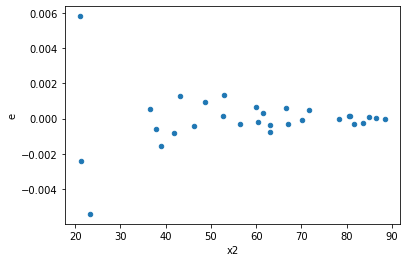

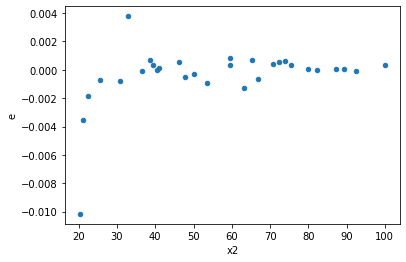

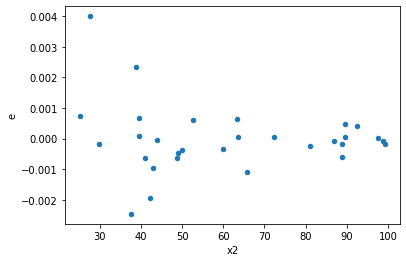

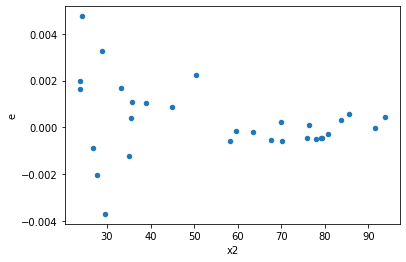

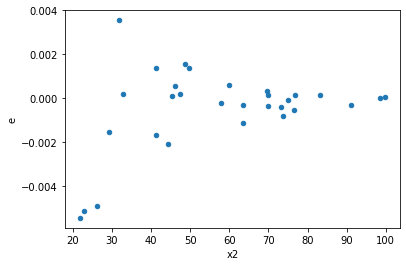

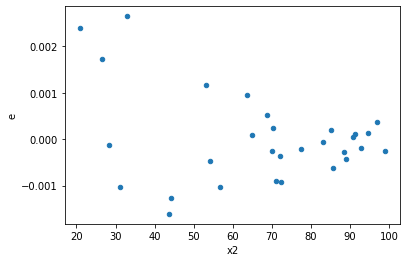

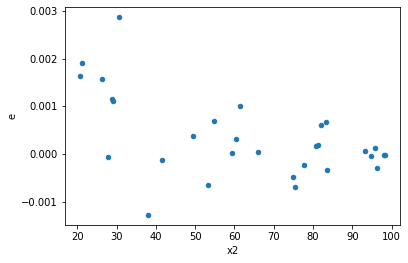

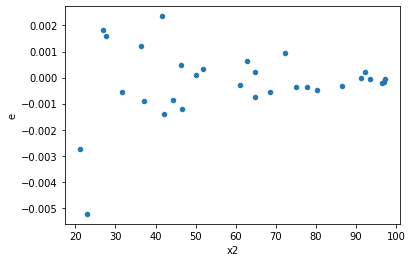

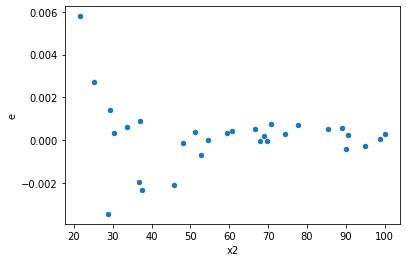

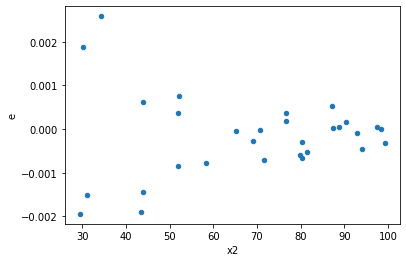

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,13.0,11.0,9.467212981827439e-06,2.4609043758742484e-05,7.282471524482645e-07,2.2371857962493166e-06,3.0720144785025423,0.07040080738674548,0.9647995963066273,0.03520040369337274,Reject001=1 : Homoscedasticity
5.0,12.0,12.0,2.1367004742970392e-06,1.5983395721148493e-05,1.780583728580866e-07,1.3319496434290411e-06,7.480410059068727,0.0014620394855584529,0.9992689802572208,0.0007310197427792264,Reject001=0 : Heteroscedasticity
6.0,16.0,8.0,2.5553943461104393e-06,5.455626377332391e-06,1.5971214663190246e-07,6.819532971665489e-07,4.26988999614591,0.04349187797541609,0.978254061012292,0.021745938987708047,Reject001=1 : Homoscedasticity
7.0,14.0,10.0,4.908033120989521e-06,3.701594644991842e-05,3.5057379435639435e-07,3.701594644991842e-06,10.5586746772886,0.0006824526978612688,0.9996587736510694,0.0003412263489306344,Reject001=0 : Heteroscedasticity
10.0,9.0,15.0,8.428159188000413e-07,1.3364432941040616e-05,9.364621320000459e-08,8.909621960693743e-07,9.51412946262445,0.00018876947060797455,0.999905615264696,9.438473530398728e-05,Reject001=0 : Heteroscedasticity
11.0,12.0,12.0,1.4487519682740035e-05,2.0595051143703942e-05,1.2072933068950029e-06,1.7162542619753286e-06,1.4215719180861734,0.5516900011756691,0.7241549994121654,0.27584500058783457,Reject001=1 : Homoscedasticity
14.0,17.0,7.0,1.8948692109862804e-05,4.74364176236667e-05,1.1146289476389885e-06,6.776631089095243e-06,6.079719267519052,0.02158392039133661,0.9892080398043317,0.010791960195668304,Reject001=1 : Homoscedasticity
16.0,13.0,11.0,1.5026757531903005e-05,5.041097521407246e-05,1.1559044255310004e-06,4.582815928552042e-06,3.9647014297456153,0.028296214534569986,0.985851892732715,0.014148107267284993,Reject001=1 : Homoscedasticity
17.0,12.0,12.0,1.2849989885807287e-05,1.7044890482720237e-05,1.0708324904839405e-06,1.4204075402266864e-06,1.3264516652691054,0.6323200245338276,0.6838399877330862,0.3161600122669138,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,12.0,6.833314441667e-05,8.799191234704441e-06,5.694428701389167e-06,7.332659362253701e-07,0.12876900821437776,0.0012205346069361735,Reject001=0 : Heteroscedasticity
1.0,10.0,14.0,6.479611640126026e-05,5.5046174159896e-06,6.479611640126026e-06,3.9318695828497144e-07,0.06068063645205195,9.259350758899139e-05,Reject001=0 : Heteroscedasticity
2.0,13.0,11.0,9.467212981827439e-06,2.4609043758742484e-05,7.282471524482645e-07,2.2371857962493166e-06,3.0720144785025423,0.07040080738674548,Reject001=1 : Homoscedasticity
3.0,10.0,14.0,4.306586592353287e-05,1.3231815518141836e-05,4.306586592353287e-06,9.45129679867274e-07,0.21946143647626465,0.02072398864956619,Reject001=1 : Homoscedasticity
4.0,20.0,4.0,6.454888949182986e-05,1.3002723923432137e-07,3.2274444745914932e-06,3.250680980858034e-08,0.010071996610474553,1.3506484732183081e-12,Reject001=0 : Heteroscedasticity
5.0,12.0,12.0,2.1367004742970392e-06,1.5983395721148493e-05,1.780583728580866e-07,1.3319496434290411e-06,7.480410059068727,0.0014620394855584529,Reject001=0 : Heteroscedasticity
6.0,16.0,8.0,2.5553943461104393e-06,5.455626377332391e-06,1.5971214663190246e-07,6.819532971665489e-07,4.26988999614591,0.04349187797541609,Reject001=1 : Homoscedasticity
7.0,14.0,10.0,4.908033120989521e-06,3.701594644991842e-05,3.5057379435639435e-07,3.701594644991842e-06,10.5586746772886,0.0006824526978612688,Reject001=0 : Heteroscedasticity
8.0,6.0,18.0,1.5098377513594416e-05,2.7512432081321253e-05,2.516396252265736e-06,1.5284684489622919e-06,0.6074037217254935,0.5574102656541065,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      518
Reject001=0 : Heteroscedasticity    482
Name: Result_test, dtype: int64